## Case study for the bike rental
## Ranjeet Bhosle
## Module : Linear Regression
## Date : 24-09-2024

In [1]:
# import all the required libraries
import numpy as py
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# import linear regression libraries
from sklearn.metrics import r2_score
#from statsmodels.formula.api import 
from sklearn.model_selection import train_test_split

In [2]:
# read the file
bike = pd.read_csv("day.csv")

In [3]:
#check the composition
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# describe the summary of the data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bike.shape

(730, 16)

<Axes: xlabel='casual', ylabel='cnt'>

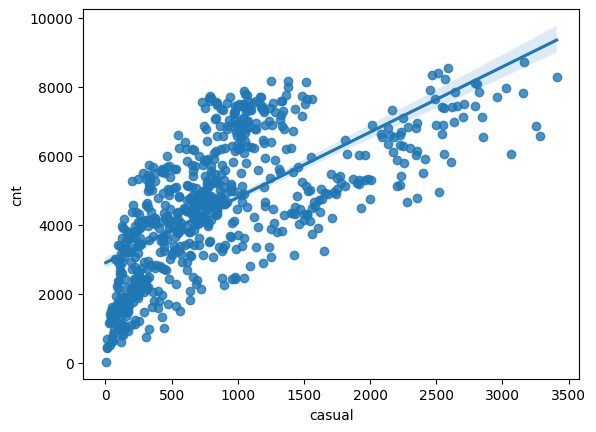

In [10]:
# print the current plots
sns.regplot(data=bike,y='cnt',x='casual')

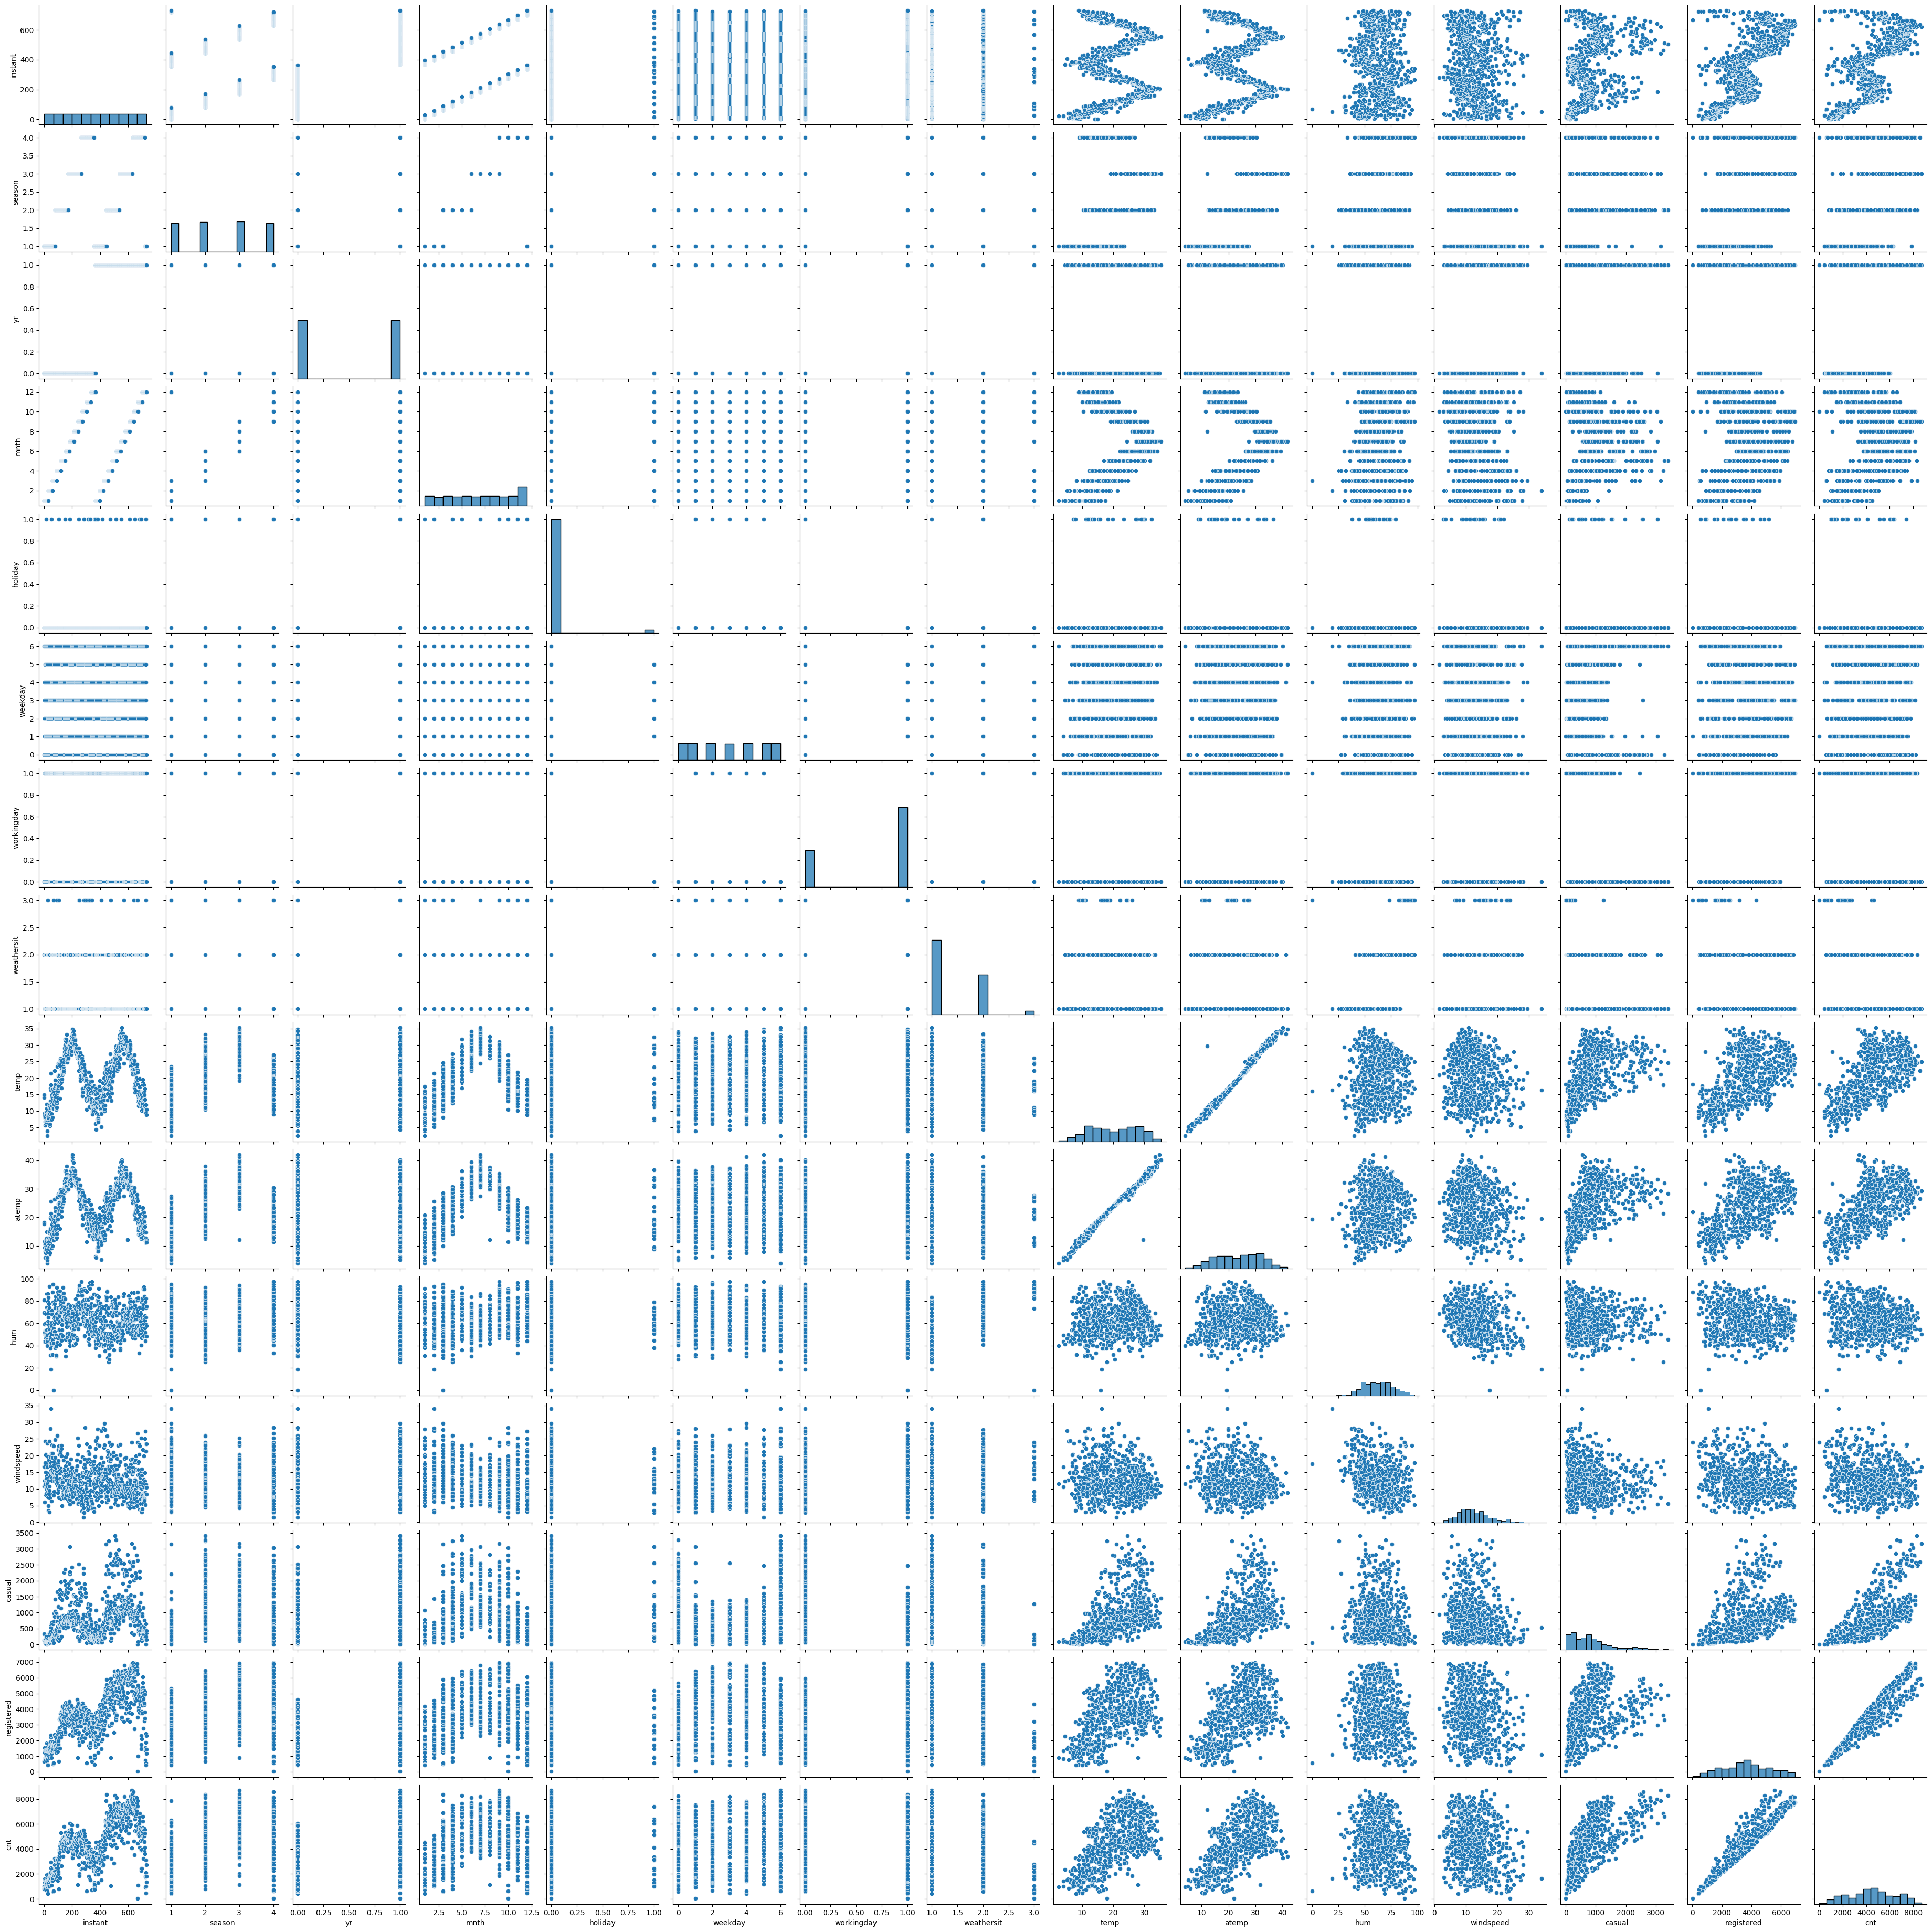

In [11]:

sns.pairplot(bike)
plt.show()
#sns.pairplot(data=bike,y_vars='cnt',x_vars=['casual','registered','weekday','weathersit','atemp','hum'])

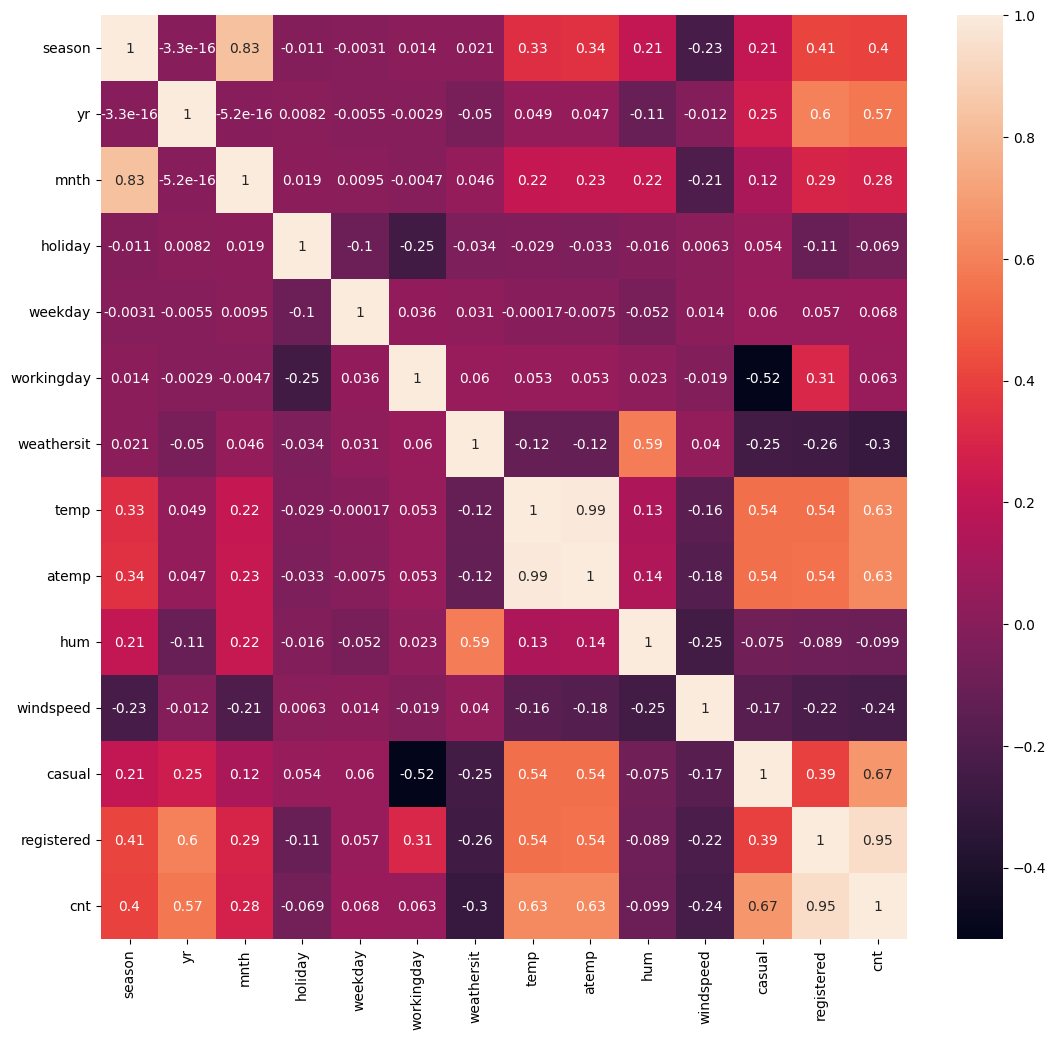

In [12]:
# print the heatmap
cols_to_drop = ['dteday','instant'] #,'cnt']

bike_wo_dt = bike.drop(cols_to_drop,axis=1)
plt.figure(figsize=(13,12))
sns.heatmap(bike_wo_dt.corr(),annot=True)
plt.show()

# clearly the high correlation fields are year, registered,casual, season,month, atemp

<Axes: xlabel='weekday', ylabel='cnt'>

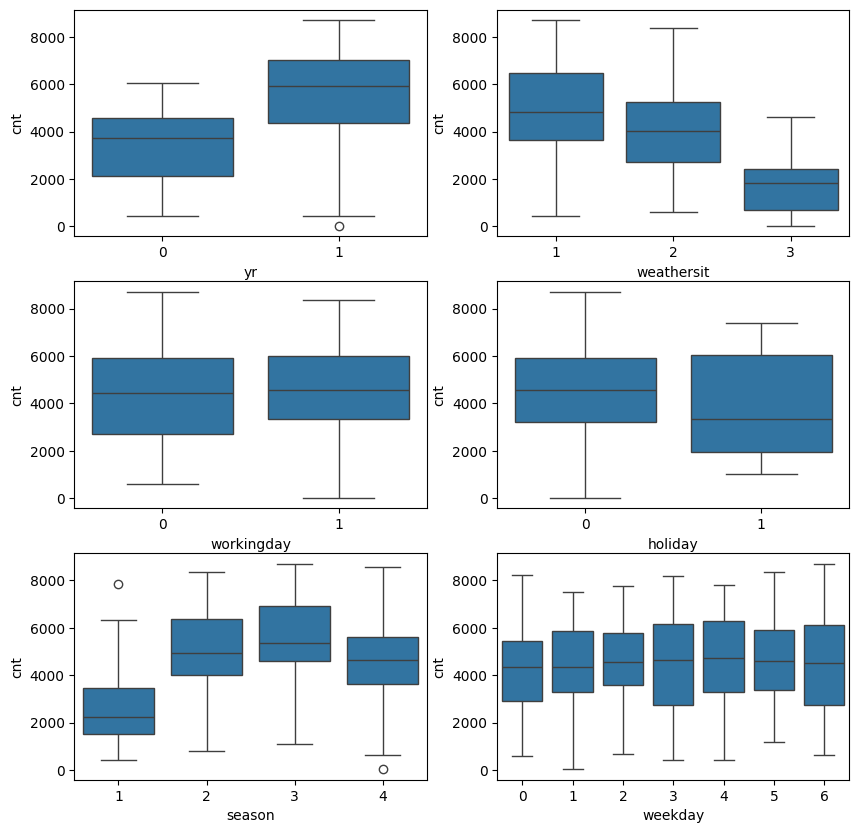

In [13]:
# print the boxplots for categorical variables
# cat_cols = 'yr','weathersit','workingday','holiday','season'
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(data=bike,x='yr',y='cnt')

plt.subplot(3,2,2)
sns.boxplot(data=bike,x='weathersit',y='cnt')

plt.subplot(3,2,3)
sns.boxplot(data=bike,x='workingday',y='cnt')

plt.subplot(3,2,4)
sns.boxplot(data=bike,x='holiday',y='cnt')

plt.subplot(3,2,5)
sns.boxplot(data=bike,x='season',y='cnt')

plt.subplot(3,2,6)
sns.boxplot(data=bike,x='weekday',y='cnt')

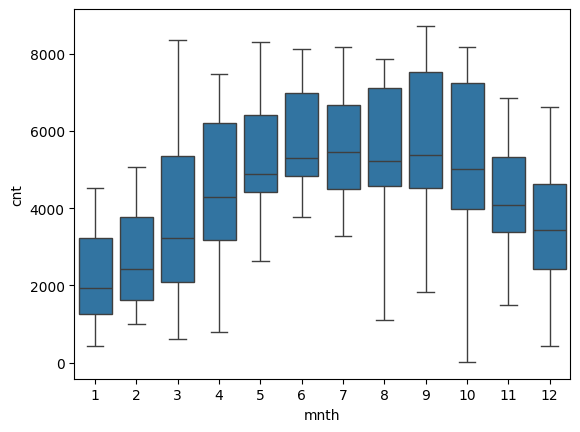

In [43]:
sns.boxplot(data=bike,x='mnth',y='cnt')
plt.show()


In [18]:
# define the categorical columns
cat_cols = ['yr','weathersit','workingday','holiday','season']

In [19]:
bike['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [20]:
bike['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [17]:
# the following variables have more than 2 categorical values
# season, weathersit, weekday
# of which season and weathersit can be applied with dummy vars logic

season_dm = pd.get_dummies(bike['season'], prefix="season", drop_first=True)
# Convert to 1s and 0s
season_dm = season_dm.astype(int) 
season_dm.value_counts()

season_2  season_3  season_4
0         1         0           188
1         0         0           184
0         0         0           180
                    1           178
Name: count, dtype: int64

In [21]:
#convert weather into dummyvars
weather_dm = pd.get_dummies(bike['weathersit'],prefix='weather',drop_first=True)
# Convert to 1s and 0s
weather_dm = weather_dm.astype(int) 
weather_dm.value_counts()

weather_2  weather_3
0          0            463
1          0            246
0          1             21
Name: count, dtype: int64

In [22]:
#concat the dummy ds of season_dm and weather_dm into bike

bike = pd.concat([bike,season_dm,weather_dm],axis=1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weather_2,weather_3
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [23]:
# drop season and weathersit now that we have created the dummy_vars

drop_cols = ['weathersit','season']
bike = bike.drop(drop_cols,axis=1)
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weather_2,weather_3
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [24]:
bike = bike.drop('dteday',axis=1)
bike = bike.drop('instant',axis=1)

In [25]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weather_2,weather_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [26]:
# split into training and test data

df_train,df_test = train_test_split(bike,train_size=0.7,random_state=100)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


num_vars =['weekday','temp','atemp','hum','windspeed','casual','registered','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weather_2,weather_3
576,1,7,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,1,0,0,0
426,1,3,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0,0,0,1,0
728,1,12,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,0,0,0,0
482,1,4,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,0,0,1,0
111,0,4,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,1,0,0,1,0


<Axes: >

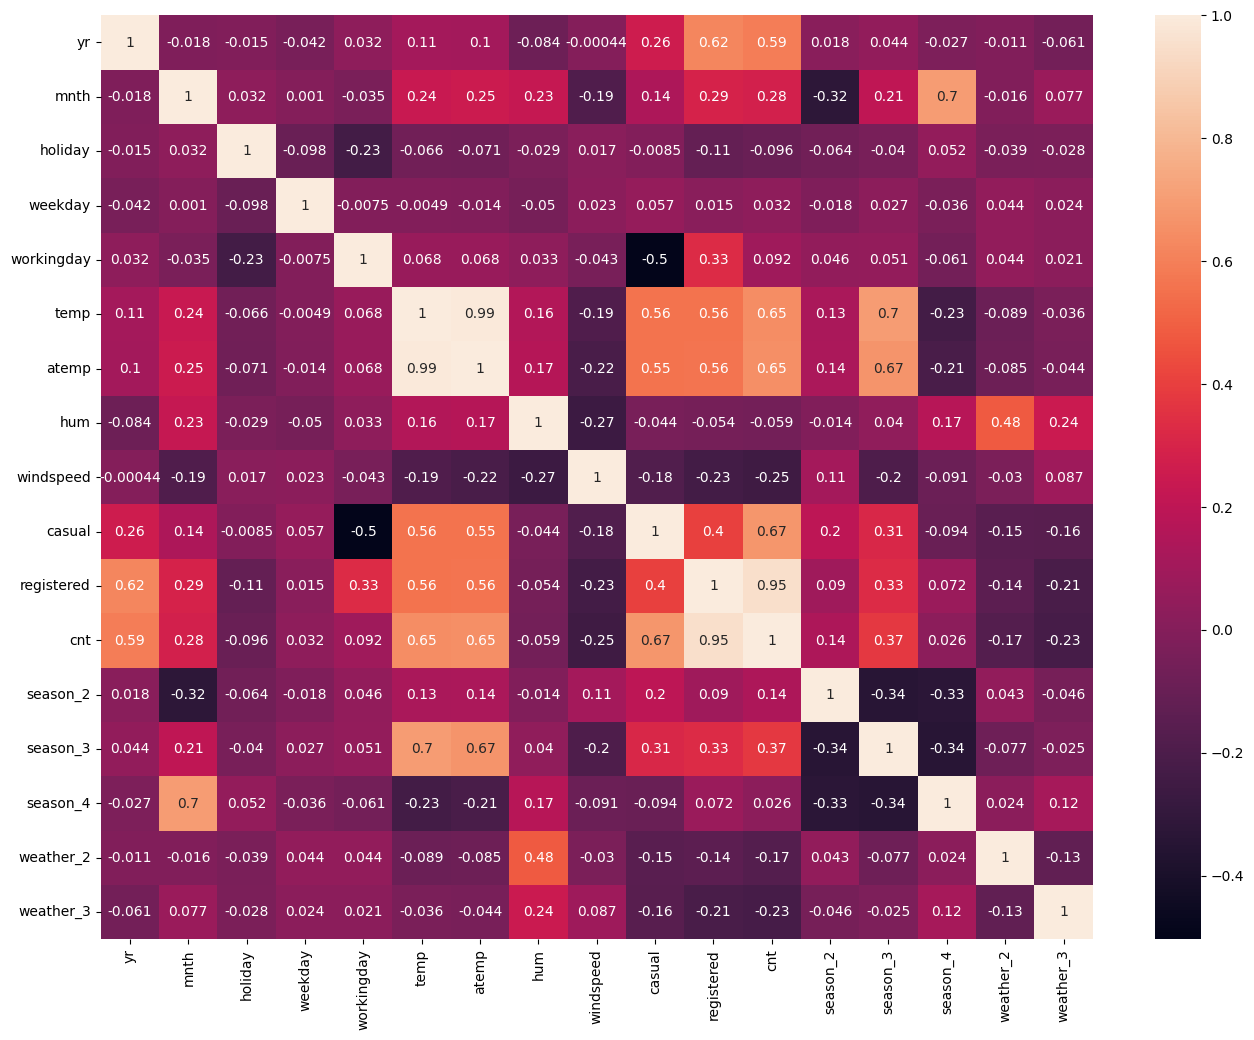

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(df_train.corr(),annot=True)

Follow the approach of building the model with all variables

In [30]:
import statsmodels.api as sm
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [31]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weather_2,weather_3
576,1,7,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,1,0,0,0
426,1,3,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0,0,0,1,0
728,1,12,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,0,0,0,0
482,1,4,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,0,0,1,0
111,0,4,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,1,0,0,1,0


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   mnth        220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   weekday     220 non-null    int64  
 4   workingday  220 non-null    int64  
 5   temp        220 non-null    float64
 6   atemp       220 non-null    float64
 7   hum         220 non-null    float64
 8   windspeed   220 non-null    float64
 9   casual      220 non-null    int64  
 10  registered  220 non-null    int64  
 11  cnt         220 non-null    int64  
 12  season_2    220 non-null    int64  
 13  season_3    220 non-null    int64  
 14  season_4    220 non-null    int64  
 15  weather_2   220 non-null    int64  
 16  weather_3   220 non-null    int64  
dtypes: float64(4), int64(13)
memory usage: 30.9 KB


In [49]:

y_train=df_train.pop('cnt')
X_train=df_train


KeyError: 'cnt'

In [50]:

y_train



576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [51]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,season_2,season_3,season_4,weather_2,weather_3
576,1,7,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,1,0,0,0
426,1,3,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0,0,0,1,0
728,1,12,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0,0,0,0,0
482,1,4,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,1,0,0,1,0
111,0,4,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,1,0,0,1,0


Automated technique using RFE

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('mnth', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('weekday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('casual', np.True_, np.int64(1)),
 ('registered', np.True_, np.int64(1)),
 ('season_2', np.True_, np.int64(1)),
 ('season_3', np.False_, np.int64(2)),
 ('season_4', np.True_, np.int64(1)),
 ('weather_2', np.True_, np.int64(1)),
 ('weather_3', np.True_, np.int64(1))]

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'season_2', 'season_4',
       'weather_2', 'weather_3'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['season_3'], dtype='object')

Build model using RFE

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [66]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [67]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.492e+30
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:27:13   Log-Likelihood:                 16865.
No. Observations:                 510   AIC:                        -3.370e+04
Df Residuals:                     494   BIC:                        -3.363e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.29e-16   3.57e-16      0.361      0.7

remove atemp as it has high pvalue


In [69]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.37
10,registered,6.81
9,casual,4.00
6,temp,3.73
5,workingday,3.45
12,season_4,3.28
2,mnth,3.16
1,yr,2.93
7,hum,1.92
13,weather_2,1.64


In [78]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [72]:
# Check the parameters obtained

lr2.params

const         2.845692e-16
yr            6.808790e-16
mnth         -2.081885e-15
holiday      -1.292369e-16
weekday       2.602085e-18
workingday    6.492203e-16
temp          4.111295e-16
hum           7.806256e-17
windspeed     2.194425e-16
casual        3.774735e-01
registered    7.968247e-01
season_2      4.397524e-16
season_4     -3.330669e-16
weather_2     1.734723e-16
weather_3     1.561251e-17
dtype: float64

In [73]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.669e+27
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:34:36   Log-Likelihood:                 15534.
No. Observations:                 510   AIC:                        -3.104e+04
Df Residuals:                     495   BIC:                        -3.097e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.846e-16   4.83e-15      0.059      0.9

Remove registered as it has a high VIF value

In [74]:
X_train_new1 = X_train_new.drop(["registered"], axis = 1)

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.02
9,casual,3.69
2,mnth,3.10
11,season_4,3.03
6,temp,2.91
5,workingday,2.27
7,hum,1.89
12,weather_2,1.58
10,season_2,1.32
13,weather_3,1.27


In [77]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new1)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [79]:
# Check the parameters obtained

lr3.params

const         0.041125
yr            0.183411
mnth          0.005199
holiday       0.003048
weekday       0.023991
workingday    0.161477
temp          0.278941
hum          -0.077415
windspeed    -0.096526
casual        0.567536
season_2      0.032597
season_4      0.081465
weather_2    -0.035674
weather_3    -0.171448
dtype: float64

In [81]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     358.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.61e-242
Time:                        16:41:01   Log-Likelihood:                 636.22
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     496   BIC:                            -1185.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0411      0.023      1.761      0.0

drop holiday as it has high pvalue of 0.88

In [82]:
X_train_new2 = X_train_new1.drop(["holiday"], axis = 1)

In [83]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.81
8,casual,3.58
2,mnth,3.09
10,season_4,3.03
5,temp,2.90
4,workingday,2.09
6,hum,1.89
11,weather_2,1.58
9,season_2,1.32
12,weather_3,1.27


In [84]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new2)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [85]:
# Check the parameters obtained

lr4.params

const         0.041626
yr            0.183466
mnth          0.005204
weekday       0.023883
workingday    0.161069
temp          0.279179
hum          -0.077496
windspeed    -0.096614
casual        0.566806
season_2      0.032617
season_4      0.081481
weather_2    -0.035728
weather_3    -0.171623
dtype: float64

In [86]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     389.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.08e-244
Time:                        17:15:56   Log-Likelihood:                 636.21
No. Observations:                 510   AIC:                            -1246.
Df Residuals:                     497   BIC:                            -1191.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0416      0.023      1.804      0.0

dropping weekday as it has a high pvalue of 0.012

In [87]:
X_train_new3 = X_train_new2.drop(["weekday"], axis = 1)

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.85
7,casual,3.51
2,mnth,3.09
9,season_4,3.01
4,temp,2.87
3,workingday,2.07
5,hum,1.88
10,weather_2,1.56
8,season_2,1.31
11,weather_3,1.26


In [89]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [90]:
lr5.params

const         0.055164
yr            0.181873
mnth          0.005413
workingday    0.163358
temp          0.273809
hum          -0.083575
windspeed    -0.095239
casual        0.576986
season_2      0.031308
season_4      0.079253
weather_2    -0.033407
weather_3    -0.167038
dtype: float64

In [92]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     419.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          9.02e-244
Time:                        17:20:50   Log-Likelihood:                 632.97
No. Observations:                 510   AIC:                            -1242.
Df Residuals:                     498   BIC:                            -1191.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0552      0.023      2.444      0.015       0.011       0.100
yr             0.1819      0.007     26.773      0.000       0.169       0.195
mnth           0.0054      0.002      3.404      0.001       0.002       0.009
workingday     0.1634      0.010     16.932      0.000       0.144       0.182
temp           0.2738      0.024     11.626      0.000       0.228       0.320
hum           -0.0836      0.029     -2.836      0.005      -0.141      -0.026
windspeed     -0.0952      0.021     -4.618      0.000      -0.136      -0.055
casual         0.5770      0.029     20.235      0.000       0.521       0.633
season_2       0.0313      0.008      3.760      0.000       0.015       0.048
season_4       0.0793      0.013      6.283      0.000       0.054       0.104
weather_2     -0.0334      0.008     -4.060      0.000      -0.050      -0.017
weather_3     -0.1670      0.021     -8.022      0.000      -0.208      -0.126
==============================================================================
Omnibus:                      105.961   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.577
Skew:                          -0.964   Prob(JB):                     1.64e-72
Kurtosis:                       6.441   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping the const column as it has a high VIF

In [117]:
X_train_new3.head()

,const,yr,mnth,workingday,temp,hum,windspeed,casual,season_2,season_4,weather_2,weather_3
576,1.0,1,7,1,0.815169,0.725633,0.264686,0.294422,0,0,0,0
426,1.0,1,3,0,0.442393,0.640189,0.255342,0.290765,0,0,1,0
728,1.0,1,12,0,0.245101,0.498067,0.663106,0.110332,0,0,0,0
482,1.0,1,4,0,0.395666,0.504508,0.188475,0.340750,1,0,1,0
111,1.0,0,4,1,0.345824,0.751824,0.380981,0.053337,1,0,1,0


In [119]:
## drop const 
X_train_new4 = X_train_new3.drop(["const"], axis = 1)

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,19.00
4,hum,16.12
1,mnth,13.87
6,casual,8.14
2,workingday,5.64
8,season_4,3.98
5,windspeed,3.57
0,yr,2.37
9,weather_2,2.18
7,season_2,1.74


In [121]:
# Add a constant
X_train_lm_new = sm.add_constant(X_train_new4)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm_new).fit()

In [122]:
lr6.params

const         0.055164
yr            0.181873
mnth          0.005413
workingday    0.163358
temp          0.273809
hum          -0.083575
windspeed    -0.095239
casual        0.576986
season_2      0.031308
season_4      0.079253
weather_2    -0.033407
weather_3    -0.167038
dtype: float64

In [123]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     419.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          9.02e-244
Time:                        19:58:14   Log-Likelihood:                 632.97
No. Observations:                 510   AIC:                            -1242.
Df Residuals:                     498   BIC:                            -1191.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0552      0.023      2.444      0.015       0.011       0.100
yr             0.1819      0.007     26.773      0.000       0.169       0.195
mnth           0.0054      0.002      3.404      0.001       0.002       0.009
workingday     0.1634      0.010     16.932      0.000       0.144       0.182
temp           0.2738      0.024     11.626      0.000       0.228       0.320
hum           -0.0836      0.029     -2.836      0.005      -0.141      -0.026
windspeed     -0.0952      0.021     -4.618      0.000      -0.136      -0.055
casual         0.5770      0.029     20.235      0.000       0.521       0.633
season_2       0.0313      0.008      3.760      0.000       0.015       0.048
season_4       0.0793      0.013      6.283      0.000       0.054       0.104
weather_2     -0.0334      0.008     -4.060      0.000      -0.050      -0.017
weather_3     -0.1670      0.021     -8.022      0.000      -0.208      -0.126
==============================================================================
Omnibus:                      105.961   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.577
Skew:                          -0.964   Prob(JB):                     1.64e-72
Kurtosis:                       6.441   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##Residual Analysis

In [93]:
y_train_pred = lr5.predict(X_train_lm5)


In [95]:
resd = y_train - y_train_pred

In [96]:
resd

576    0.082145
426    0.034310
728   -0.123893
482   -0.018449
111   -0.073327
         ...   
578    0.054683
53    -0.043861
350    0.120070
79    -0.079115
520    0.124992
Length: 510, dtype: float64

C:\Users\ranjeet.maruti\AppData\Local\Temp\ipykernel_24200\2297016229.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resd)


<Axes: ylabel='Density'>

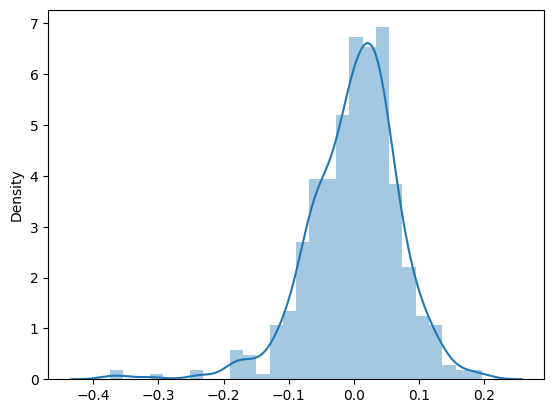

In [98]:
sns.distplot(resd)

##Final stage: Make inferences

In [103]:
# create the list of vars that are useful for prediction

test_cols = X_train_lm5.columns

In [104]:
test_cols

Index(['const', 'yr', 'mnth', 'workingday', 'temp', 'hum', 'windspeed',
       'casual', 'season_2', 'season_4', 'weather_2', 'weather_3'],
      dtype='object')

In [102]:
df_test.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_2',
       'season_3', 'season_4', 'weather_2', 'weather_3'],
      dtype='object')

In [111]:
df_test.shape


(220, 17)

In [105]:
df_test[test_cols]=scaler.transform(df_test[test_cols])


KeyError: "['const'] not in index"

In [35]:

import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm)

In [37]:
lr_model = lr.fit()

In [38]:
lr_model.params

const         5.122855e-16
yr            1.249001e-16
mnth         -1.516799e-16
holiday      -4.488597e-17
weekday      -2.428613e-17
workingday   -3.946496e-17
temp         -4.891920e-16
atemp         2.168404e-16
hum           2.775558e-16
windspeed     6.175616e-16
casual        3.774735e-01
registered    7.968247e-01
season_2      6.678685e-17
season_3      1.734723e-16
season_4      4.631712e-16
weather_2    -3.053113e-16
weather_3     2.584738e-16
dtype: float64

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.386e+30
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:26:13   Log-Likelihood:                 17289.
No. Observations:                 510   AIC:                        -3.454e+04
Df Residuals:                     493   BIC:                        -3.447e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.123e-16   1.56e-16      3.276      0.001    2.05e-16    8.19e-16
yr          1.249e-16   7.14e-17      1.750      0.081   -1.53e-17    2.65e-16
mnth       -1.517e-16   1.18e-17    -12.862      0.000   -1.75e-16   -1.29e-16
holiday    -4.489e-17   1.38e-16     -0.325      0.745   -3.16e-16    2.26e-16
weekday    -2.429e-17   6.34e-17     -0.383      0.702   -1.49e-16       1e-16
workingday -3.946e-17    8.2e-17     -0.481      0.631   -2.01e-16    1.22e-16
temp       -4.892e-16   7.05e-16     -0.694      0.488   -1.87e-15    8.95e-16
atemp       2.168e-16   7.12e-16      0.305      0.761   -1.18e-15    1.62e-15
hum         2.776e-16   1.97e-16      1.406      0.160    -1.1e-16    6.65e-16
windspeed   6.176e-16   1.41e-16      4.365      0.000     3.4e-16    8.96e-16
casual         0.3775   2.01e-16   1.88e+15      0.000       0.377       0.377
registered     0.7968   2.39e-16   3.34e+15      0.000       0.797       0.797
season_2    6.679e-17   8.26e-17      0.809      0.419   -9.54e-17    2.29e-16
season_3    1.735e-16   1.17e-16      1.485      0.138   -5.61e-17    4.03e-16
season_4    4.632e-16   1.17e-16      3.961      0.000    2.33e-16    6.93e-16
weather_2  -3.053e-16   5.61e-17     -5.447      0.000   -4.15e-16   -1.95e-16
weather_3   2.585e-16   1.49e-16      1.739      0.083   -3.35e-17     5.5e-16
==============================================================================
Omnibus:                        3.969   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.183
Skew:                          -0.080   Prob(JB):                        0.204
Kurtosis:                       2.647   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a data frame that will contain the name of all feature variables

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif["VIF"] = round(vif["VIF"],2)

vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

In [33]:
# decide the fields to drop
# criteria 1: high p values (>0.05) and high VIF (> 5)
# fields are: temp, atemp, workingday

In [ ]:
drop_cols = ["temp","atemp","workingday"]
X = X_train.drop(drop_cols,axis=1)
X

In [35]:
#add constant 
X_train_sm = sm.add_constant(X)

# build a model
lr = sm.OLS(y_train,X_train_sm)

# fit
lr_model =  lr.fit()

In [ ]:
#check params

lr_model.params

In [ ]:
lr_model.summary()

In [ ]:
X_train.head()

In [ ]:
drop_cols = ["holiday","weekday"]
X = X_train.drop(drop_cols,axis=1)
X

In [40]:
#add constant 
X_train_sm = sm.add_constant(X)

# build a model
lr = sm.OLS(y_train,X_train_sm)

# fit
lr_model =  lr.fit()

In [ ]:
#check params

lr_model.params

In [ ]:
lr_model.summary()